In [1]:
%cd /content/drive/MyDrive/Kaggle/PredictFutureSales /competitive-data-science-predict-future-sales.zip (Unzipped Files)

/content/drive/MyDrive/Kaggle/PredictFutureSales /competitive-data-science-predict-future-sales.zip (Unzipped Files)


In [2]:
%ls

item_categories.csv  sales_train.csv        shops.csv                test.csv
items.csv            sample_submission.csv  submission_lightgbm.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import StandardScaler
InteractiveShell.ast_node_interactivity = "all"

In [4]:
item_categories = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
sales_train = pd.read_csv("sales_train.csv")
sample_submission = pd.read_csv("sample_submission.csv")
shops = pd.read_csv("shops.csv")
test = pd.read_csv("test.csv")

In [5]:
# item_categories.head()
items.head()
sales_train
sample_submission
# shops.head()
test.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
del items['item_name']
del sales_train["date"]

In [7]:
# item_categories.head()
items
sales_train
# sample_submission
# shops.head()
test.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40
...,...,...
22165,22165,31
22166,22166,54
22167,22167,49
22168,22168,62


,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,59,22154,999.00,1.0
1,0,25,2552,899.00,1.0
2,0,25,2552,899.00,-1.0
3,0,25,2554,1709.05,1.0
4,0,25,2555,1099.00,1.0
...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0
2935845,33,25,7460,299.00,1.0
2935846,33,25,7459,349.00,1.0
2935847,33,25,7440,299.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
sales_train = sales_train.merge(items, on="item_id", how="left")
display(sales_train)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,0,59,22154,999.00,1.0,37
1,0,25,2552,899.00,1.0,58
2,0,25,2552,899.00,-1.0,58
3,0,25,2554,1709.05,1.0,58
4,0,25,2555,1099.00,1.0,56
...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,55
2935845,33,25,7460,299.00,1.0,55
2935846,33,25,7459,349.00,1.0,55
2935847,33,25,7440,299.00,1.0,57


各店舗のアイテムごとの月の売り上げ個数を計算する

In [9]:
sale_train_group = sales_train.groupby(["date_block_num", "shop_id", "item_id"], as_index=False)["item_cnt_day"].sum()
display(sale_train_group)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


月、店舗、アイテムが同じとき一行にまとめる

In [10]:
del sales_train["item_cnt_day"]
sales_train = sales_train.drop_duplicates(["date_block_num","shop_id","item_id"])
display(sales_train)

,date_block_num,shop_id,item_id,item_price,item_category_id
0,0,59,22154,999.00,37
1,0,25,2552,899.00,58
3,0,25,2554,1709.05,58
4,0,25,2555,1099.00,56
5,0,25,2564,349.00,59
...,...,...,...,...,...
2935840,33,25,7409,299.00,55
2935841,33,25,7393,349.00,55
2935842,33,25,7384,749.00,55
2935846,33,25,7459,349.00,55


月の売り上げ個数を結合する

In [11]:
sales_train = sale_train_group.merge(sales_train, on=["date_block_num","shop_id","item_id"], how="left")
sales_train = sales_train.rename(columns={"item_cnt_day":"item_cnt_month"})
display(sales_train)

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_category_id
0,0,0,32,6.0,221.0,40
1,0,0,33,3.0,347.0,37
2,0,0,35,1.0,247.0,40
3,0,0,43,1.0,221.0,40
4,0,0,51,2.0,130.0,57
...,...,...,...,...,...,...
1609119,33,59,22087,6.0,119.0,83
1609120,33,59,22088,2.0,119.0,83
1609121,33,59,22091,1.0,179.0,83
1609122,33,59,22100,1.0,629.0,42


売り上げに周期性があるため目立つデータを消去する

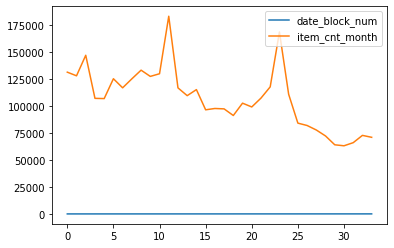

In [12]:
date_block_num_group = sales_train.groupby("date_block_num", as_index=False)["item_cnt_month"].sum()
date_block_num_group.plot()

In [13]:
row_drop1 = sales_train.index[sales_train["date_block_num"]==11]
row_drop2 = sales_train.index[sales_train["date_block_num"]==23]
sales_train = sales_train.drop(row_drop1)
sales_train = sales_train.drop(row_drop2)
sales_train

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_category_id
0,0,0,32,6.0,221.0,40
1,0,0,33,3.0,347.0,37
2,0,0,35,1.0,247.0,40
3,0,0,43,1.0,221.0,40
4,0,0,51,2.0,130.0,57
...,...,...,...,...,...,...
1609119,33,59,22087,6.0,119.0,83
1609120,33,59,22088,2.0,119.0,83
1609121,33,59,22091,1.0,179.0,83
1609122,33,59,22100,1.0,629.0,42


バリデーションのデータ分割をした後にtrainデータのカテゴリ変数をターゲットエンコーディングする。そうしなければバリデーションがリークする

In [14]:
sales_train_y = sales_train["item_cnt_month"]
sales_train_x = sales_train.drop("item_cnt_month",axis=1)
display(sales_train_x)
display(sales_train_y)


,date_block_num,shop_id,item_id,item_price,item_category_id
0,0,0,32,221.0,40
1,0,0,33,347.0,37
2,0,0,35,247.0,40
3,0,0,43,221.0,40
4,0,0,51,130.0,57
...,...,...,...,...,...
1609119,33,59,22087,119.0,83
1609120,33,59,22088,119.0,83
1609121,33,59,22091,179.0,83
1609122,33,59,22100,629.0,42


0          6.0
1          3.0
2          1.0
3          1.0
4          2.0
          ... 
1609119    6.0
1609120    2.0
1609121    1.0
1609122    1.0
1609123    1.0
Name: item_cnt_month, Length: 1483573, dtype: float64

In [15]:
is_tr = sales_train_x["date_block_num"]<33
is_va = sales_train_x["date_block_num"]==33
X_train, X_valid = sales_train_x[is_tr], sales_train_x[is_va]
y_train, y_valid = sales_train_y[is_tr], sales_train_y[is_va]
categorical_features = ["date_std","shop_id_std","item_id_std","item_price","item_category_id_std"]
X_train
X_valid
y_train
y_valid

,date_block_num,shop_id,item_id,item_price,item_category_id
0,0,0,32,221.0,40
1,0,0,33,347.0,37
2,0,0,35,247.0,40
3,0,0,43,221.0,40
4,0,0,51,130.0,57
...,...,...,...,...,...
1577588,32,59,22087,119.0,83
1577589,32,59,22088,119.0,83
1577590,32,59,22091,179.0,83
1577591,32,59,22100,629.0,42


,date_block_num,shop_id,item_id,item_price,item_category_id
1577593,33,2,31,399.0,37
1577594,33,2,486,300.0,73
1577595,33,2,787,420.0,49
1577596,33,2,794,3300.0,73
1577597,33,2,968,58.0,40
...,...,...,...,...,...
1609119,33,59,22087,119.0,83
1609120,33,59,22088,119.0,83
1609121,33,59,22091,179.0,83
1609122,33,59,22100,629.0,42


0          6.0
1          3.0
2          1.0
3          1.0
4          2.0
          ... 
1577588    3.0
1577589    1.0
1577590    3.0
1577591    1.0
1577592    1.0
Name: item_cnt_month, Length: 1452042, dtype: float64

1577593    1.0
1577594    3.0
1577595    1.0
1577596    1.0
1577597    1.0
          ... 
1609119    6.0
1609120    2.0
1609121    1.0
1609122    1.0
1609123    1.0
Name: item_cnt_month, Length: 31531, dtype: float64

taget encoding

In [16]:
def Standard(s):
  return (s-s.mean())/s.std()
# X_train = X_train.merge(y_train,on=None, how="left")  
#この操作ではうまくいかなかったためX_trainに目的変数を加えた同じ範囲のデータを以下2行で取得した
is_tr = sales_train["date_block_num"]<33
X_train = sales_train[is_tr]
#↑ターゲットエンコーディングのためにint_cnt_monthが必要、あとでint_cnt_monthを消さなければ目的変数を含まないxデータとしてふさわしくない
date_block_num_group = X_train.groupby("date_block_num", as_index=False)["item_cnt_month"].sum()
date_block_num_group = date_block_num_group.rename(columns={"item_cnt_month":"date_std"})
date_block_num_group["date_std"] = Standard(date_block_num_group["date_std"])
X_train = X_train.merge(date_block_num_group, on="date_block_num", how="left")

shop_id_group = X_train.groupby("shop_id", as_index=False)["item_cnt_month"].sum()
shop_id_group = shop_id_group.rename(columns={"item_cnt_month":"shop_id_std"})
shop_id_group["shop_id_std"] = Standard(shop_id_group["shop_id_std"])
X_train = X_train.merge(shop_id_group, on="shop_id", how="left")

item_id_group = X_train.groupby("item_id", as_index=False)["item_cnt_month"].sum()
item_id_group = item_id_group.rename(columns={"item_cnt_month":"item_id_std"})
item_id_group["item_id_std"] = Standard(item_id_group["item_id_std"])
X_train = X_train.merge(item_id_group, on="item_id", how="left")

item_category_id_group = X_train.groupby("item_category_id", as_index=False)["item_cnt_month"].sum()
item_category_id_group = item_category_id_group.rename(columns={"item_cnt_month":"item_category_id_std"})
item_category_id_group["item_category_id_std"] = Standard(item_category_id_group["item_category_id_std"])
X_train = X_train.merge(item_category_id_group, on="item_category_id", how="left")

X_train["item_price"] = Standard(X_train["item_price"])


# X_train[X_train["date_block_num"]==10] #date_std=0.798032
# X_train[X_train["date_block_num"]==22]  #date_std=0.370566	

# testのdate_block_numは34だがtarget encodingができないためdate_stdが不明
# date_stdの周期性、減衰を考慮してtestにdate_std = 0.370566-(0.798032-0.370566)=-0.0569を追加
del X_train["item_cnt_month"]
X_train
test["date_std"]=	-0.0569

X_valid["date_std"] = -0.0569

,date_block_num,shop_id,item_id,item_price,item_category_id,date_std,shop_id_std,item_id_std,item_category_id_std
0,0,0,32,-0.371518,40,1.206713,-0.840044,1.515068,5.972953
1,0,0,33,-0.286299,37,1.206713,-0.840044,0.512324,1.583090
2,0,0,35,-0.353933,40,1.206713,-0.840044,0.059226,5.972953
3,0,0,43,-0.371518,40,1.206713,-0.840044,-0.121166,5.972953
4,0,0,51,-0.433066,57,1.206713,-0.840044,0.061767,-0.093938
...,...,...,...,...,...,...,...,...,...
1452037,32,59,22087,-0.440506,83,-1.371415,-0.210963,2.487324,-0.306208
1452038,32,59,22088,-0.440506,83,-1.371415,-0.210963,3.807660,-0.306208
1452039,32,59,22091,-0.399925,83,-1.371415,-0.210963,0.773173,-0.306208
1452040,32,59,22100,-0.095570,42,-1.371415,-0.210963,0.067696,-0.390805


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


trainの整理終了
以下テストデータに情報を付与する
shop_idとitem_idを基準としてtestにsales_trainをマージしたいがshop_idとitem_idが同じでdate_block_numが異なる行が多くありitem_priceにばらつきがあるため月に影響を受けないitem_priceを平均で求める

In [17]:
mergedata_fortest = sales_train.drop("item_cnt_month", axis=1)
mergedata_fortest = mergedata_fortest.groupby(["shop_id", "item_id"], as_index=False)["item_price","item_category_id"].mean()
display(mergedata_fortest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,shop_id,item_id,item_price,item_category_id
0,0,30,265.0,40.0
1,0,31,434.0,37.0
2,0,32,221.0,40.0
3,0,33,347.0,37.0
4,0,35,247.0,40.0
...,...,...,...,...
414555,59,22154,999.0,37.0
414556,59,22155,149.0,37.0
414557,59,22162,369.0,40.0
414558,59,22164,724.0,37.0


In [18]:
display(test)

,ID,shop_id,item_id,date_std
0,0,5,5037,-0.0569
1,1,5,5320,-0.0569
2,2,5,5233,-0.0569
3,3,5,5232,-0.0569
4,4,5,5268,-0.0569
...,...,...,...,...
214195,214195,45,18454,-0.0569
214196,214196,45,16188,-0.0569
214197,214197,45,15757,-0.0569
214198,214198,45,19648,-0.0569


正確なlocal cvを求めるためtestとX_validに同じ操作をする

In [19]:
display(X_valid)

,date_block_num,shop_id,item_id,item_price,item_category_id,date_std
1577593,33,2,31,399.0,37,-0.0569
1577594,33,2,486,300.0,73,-0.0569
1577595,33,2,787,420.0,49,-0.0569
1577596,33,2,794,3300.0,73,-0.0569
1577597,33,2,968,58.0,40,-0.0569
...,...,...,...,...,...,...
1609119,33,59,22087,119.0,83,-0.0569
1609120,33,59,22088,119.0,83,-0.0569
1609121,33,59,22091,179.0,83,-0.0569
1609122,33,59,22100,629.0,42,-0.0569


In [20]:
shop_id_group
item_id_group
item_category_id_group

,shop_id,shop_id_std
0,0,-0.840044
1,1,-0.945527
2,2,-0.547787
3,3,-0.573542
4,4,-0.310344
5,5,-0.338348
6,6,0.673552
7,7,0.080864
8,8,-0.998640
9,9,-0.820978


,item_id,item_id_std
0,0,-0.127941
1,1,-0.123707
2,2,-0.127094
3,3,-0.127094
4,4,-0.127941
...,...,...
21203,22165,-0.127094
21204,22166,0.120204
21205,22167,0.853630
21206,22168,-0.123707


,item_category_id,item_category_id_std
0,0,-0.424148
1,1,-0.424159
2,2,-0.239123
3,3,-0.166923
4,4,-0.399047
...,...,...
79,79,-0.278179
80,80,-0.356389
81,81,-0.413619
82,82,-0.310837


In [21]:
X_valid = X_valid.merge(shop_id_group, on="shop_id", how="left")
X_valid = X_valid.merge(item_id_group, on="item_id", how="left")
X_valid = X_valid.merge(item_category_id_group, on="item_category_id", how="left")

display(X_valid)

,date_block_num,shop_id,item_id,item_price,item_category_id,date_std,shop_id_std,item_id_std,item_category_id_std
0,33,2,31,399.0,37,-0.0569,-0.547787,1.034869,1.583090
1,33,2,486,300.0,73,-0.0569,-0.547787,1.164447,-0.274897
2,33,2,787,420.0,49,-0.0569,-0.547787,0.085481,-0.156648
3,33,2,794,3300.0,73,-0.0569,-0.547787,-0.114391,-0.274897
4,33,2,968,58.0,40,-0.0569,-0.547787,0.418317,5.972953
...,...,...,...,...,...,...,...,...,...
31526,33,59,22087,119.0,83,-0.0569,-0.210963,2.487324,-0.306208
31527,33,59,22088,119.0,83,-0.0569,-0.210963,3.807660,-0.306208
31528,33,59,22091,179.0,83,-0.0569,-0.210963,0.773173,-0.306208
31529,33,59,22100,629.0,42,-0.0569,-0.210963,0.067696,-0.390805


In [22]:
test = test.merge(mergedata_fortest, on=["shop_id","item_id"], how="left")

test = test.merge(shop_id_group, on="shop_id", how="left")
test = test.merge(item_id_group, on="item_id", how="left")
test = test.merge(item_category_id_group, on="item_category_id", how="left")

display(test)

,ID,shop_id,item_id,date_std,item_price,item_category_id,shop_id_std,item_id_std,item_category_id_std
0,0,5,5037,-0.0569,1717.8125,19.0,-0.338348,0.728287,2.077323
1,1,5,5320,-0.0569,NaN,NaN,-0.338348,NaN,NaN
2,2,5,5233,-0.0569,839.0000,19.0,-0.338348,0.265026,2.077323
3,3,5,5232,-0.0569,599.0000,23.0,-0.338348,-0.033087,1.206907
4,4,5,5268,-0.0569,NaN,NaN,-0.338348,NaN,NaN
...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,-0.0569,174.0000,55.0,-0.334613,0.217599,3.031838
214196,214196,45,16188,-0.0569,NaN,NaN,-0.334613,-0.126247,NaN
214197,214197,45,15757,-0.0569,199.0000,55.0,-0.334613,0.157468,3.031838
214198,214198,45,19648,-0.0569,NaN,NaN,-0.334613,-0.092371,NaN


In [23]:
X_valid["item_price"] = X_valid["item_price"].fillna(test["item_price"].mean())

In [24]:

test["item_price"] = test["item_price"].fillna(test["item_price"].mean())

# ターゲットエンコーディングしたカテゴリ変数の欠損値は目的変数に依存しているため無理に埋めない
# test["item_category_id"] = test["item_category_id"].fillna(0)
# test["shop_id"] = test["shop_id"].fillna(test["shop_id"].mean())
# test["item_id_std"] = test["item_id_std"].fillna(test["item_id_std"].mean())
# test["item_category_id_std"] = test["item_category_id_std"].fillna(0)


In [25]:
del X_train["date_block_num"]
del X_train["shop_id"]
del X_train["item_id"]
del X_train["item_category_id"]
del X_valid["date_block_num"]
del X_valid["shop_id"]
del X_valid["item_id"]
del X_valid["item_category_id"]
del test["shop_id"]
del test["item_id"]
del test["item_category_id"]
#del test["ID"]

X_train
X_valid
test

,item_price,date_std,shop_id_std,item_id_std,item_category_id_std
0,-0.371518,1.206713,-0.840044,1.515068,5.972953
1,-0.286299,1.206713,-0.840044,0.512324,1.583090
2,-0.353933,1.206713,-0.840044,0.059226,5.972953
3,-0.371518,1.206713,-0.840044,-0.121166,5.972953
4,-0.433066,1.206713,-0.840044,0.061767,-0.093938
...,...,...,...,...,...
1452037,-0.440506,-1.371415,-0.210963,2.487324,-0.306208
1452038,-0.440506,-1.371415,-0.210963,3.807660,-0.306208
1452039,-0.399925,-1.371415,-0.210963,0.773173,-0.306208
1452040,-0.095570,-1.371415,-0.210963,0.067696,-0.390805


,item_price,date_std,shop_id_std,item_id_std,item_category_id_std
0,399.0,-0.0569,-0.547787,1.034869,1.583090
1,300.0,-0.0569,-0.547787,1.164447,-0.274897
2,420.0,-0.0569,-0.547787,0.085481,-0.156648
3,3300.0,-0.0569,-0.547787,-0.114391,-0.274897
4,58.0,-0.0569,-0.547787,0.418317,5.972953
...,...,...,...,...,...
31526,119.0,-0.0569,-0.210963,2.487324,-0.306208
31527,119.0,-0.0569,-0.210963,3.807660,-0.306208
31528,179.0,-0.0569,-0.210963,0.773173,-0.306208
31529,629.0,-0.0569,-0.210963,0.067696,-0.390805


,ID,date_std,item_price,shop_id_std,item_id_std,item_category_id_std
0,0,-0.0569,1717.812500,-0.338348,0.728287,2.077323
1,1,-0.0569,991.822203,-0.338348,NaN,NaN
2,2,-0.0569,839.000000,-0.338348,0.265026,2.077323
3,3,-0.0569,599.000000,-0.338348,-0.033087,1.206907
4,4,-0.0569,991.822203,-0.338348,NaN,NaN
...,...,...,...,...,...,...
214195,214195,-0.0569,174.000000,-0.334613,0.217599,3.031838
214196,214196,-0.0569,991.822203,-0.334613,-0.126247,NaN
214197,214197,-0.0569,199.000000,-0.334613,0.157468,3.031838
214198,214198,-0.0569,991.822203,-0.334613,-0.092371,NaN


In [26]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train,y_train,categorical_feature = categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

params = {"objective":"regression",
          "metric":"rmse"}

model = lgb.train(params,lgb_train,valid_sets=[lgb_train, lgb_eval],verbose_eval=10, num_boost_round=1000,early_stopping_rounds=20)
y_pred_lgb = model.predict(test, num_iteration=model.best_iteration)
display(y_pred_lgb)


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	training's rmse: 6.3939	valid_1's rmse: 13.7859
[20]	training's rmse: 6.07186	valid_1's rmse: 13.8014
[30]	training's rmse: 6.00599	valid_1's rmse: 13.8302
Early stopping, best iteration is:
[13]	training's rmse: 6.2349	valid_1's rmse: 13.7723


array([2.0512923 , 2.26850284, 2.22396842, ..., 2.0512923 , 2.0512923 ,
       2.0512923 ])

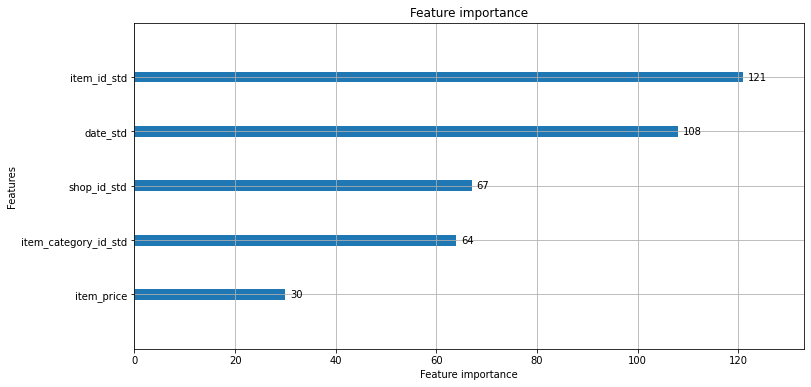

,ID,date_std,item_price,shop_id_std,item_id_std,item_category_id_std
0,0,-0.0569,1717.812500,-0.338348,0.728287,2.077323
1,1,-0.0569,991.822203,-0.338348,NaN,NaN
2,2,-0.0569,839.000000,-0.338348,0.265026,2.077323
3,3,-0.0569,599.000000,-0.338348,-0.033087,1.206907
4,4,-0.0569,991.822203,-0.338348,NaN,NaN
...,...,...,...,...,...,...
214195,214195,-0.0569,174.000000,-0.334613,0.217599,3.031838
214196,214196,-0.0569,991.822203,-0.334613,-0.126247,NaN
214197,214197,-0.0569,199.000000,-0.334613,0.157468,3.031838
214198,214198,-0.0569,991.822203,-0.334613,-0.092371,NaN


,date_block_num,shop_id,item_id,item_price,item_category_id
0,0,0,32,221.0,40
1,0,0,33,347.0,37
2,0,0,35,247.0,40
3,0,0,43,221.0,40
4,0,0,51,130.0,57
...,...,...,...,...,...
1609119,33,59,22087,119.0,83
1609120,33,59,22088,119.0,83
1609121,33,59,22091,179.0,83
1609122,33,59,22100,629.0,42


In [27]:
lgb.plot_importance(model,figsize=(12,6))
plt.show()
test
sales_train_x

リッジ回帰

In [28]:
# from sklearn.linear_model import Ridge
# ridge = Ridge(alpha=1.0).fit(sales_train_x.drop("date_std", axis=1), sales_train_y)
# y_pred_ridge = ridge.predict(test)
# display(y_pred_ridge)

ニューラルネットワーク

In [29]:
sales_train =sales_train.drop_duplicates("item_cnt_month")
sales_train
#nnのoutput_dimは418

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_category_id
0,0,0,32,6.0,221.0,40
1,0,0,33,3.0,347.0,37
2,0,0,35,1.0,247.0,40
4,0,0,51,2.0,130.0,57
10,0,0,98,25.0,268.0,40
...,...,...,...,...,...,...
1582127,33,12,11373,2253.0,173.0,9
1590508,33,25,20949,461.0,5.0,71
1592642,33,28,20949,229.0,5.0,71
1594817,33,31,20949,431.0,5.0,71


In [30]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [31]:
test.isna()

,ID,date_std,item_price,shop_id_std,item_id_std,item_category_id_std
0,False,False,False,False,False,False
1,False,False,False,False,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,True
...,...,...,...,...,...,...
214195,False,False,False,False,False,False
214196,False,False,False,False,False,True
214197,False,False,False,False,False,False
214198,False,False,False,False,False,True


In [32]:
test["shop_id_std"] = test["shop_id_std"].fillna(test["shop_id_std"].mean())
test["item_id_std"] = test["item_id_std"].fillna(test["item_id_std"].mean())
test["item_category_id_std"] = test["item_category_id_std"].fillna(0)
X_valid["shop_id_std"] = X_valid["shop_id_std"].fillna(X_valid["shop_id_std"].mean())
X_valid["item_id_std"] = X_valid["item_id_std"].fillna(X_valid["item_id_std"].mean())
X_valid["item_category_id_std"] = X_valid["item_category_id_std"].fillna(0)
test.isna().sum()
X_train.isna().sum()
X_valid.isna().sum()

ID                      0
date_std                0
item_price              0
shop_id_std             0
item_id_std             0
item_category_id_std    0
dtype: int64

item_price              0
date_std                0
shop_id_std             0
item_id_std             0
item_category_id_std    0
dtype: int64

item_price              0
date_std                0
shop_id_std             0
item_id_std             0
item_category_id_std    0
dtype: int64

In [33]:
from torch.utils.data.dataset import TensorDataset
X_train = X_train[["item_price",	"date_std",	"shop_id_std",	"item_id_std",	"item_category_id_std"]].values
X_valid = X_valid[["item_price",	"date_std",	"shop_id_std",	"item_id_std",	"item_category_id_std"]].values
y_train = y_train.values
y_valid = y_valid.values
# y_train=y_train.astype(float)
# y_valid=y_valid.astype(float)

X_Train = torch.from_numpy(X_train)
y_Train = torch.from_numpy(y_train)

X_Valid = torch.from_numpy(X_valid)
y_Valid = torch.from_numpy(y_valid)

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)


train = torch.utils.data.TensorDataset(X_Train,y_Train)
test = torch.utils.data.TensorDataset(X_Valid,y_Valid)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


In [34]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.elu3(out)
        
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = len(X_train) * 5
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 418

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
y_pred_nn = []
for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_loader):

        X = Variable(X.view(-1, 5))
        y = Variable(y)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(X)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, test)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for X, y in test_loader:

                test = Variable(X.view(-1, 5))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                y_pred_nn = y_pred_nn.append(predicted)
                
                # Total number of labels
                total += len(y)

                # Total correct predictions
                correct += (predicted == y).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 1 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

In [36]:
y_pred_nn

[]

データまとめ

In [37]:
sub = sample_submission
sub["item_cnt_month"] = y_pred_lgb
sub.to_csv("submission_lightgbm.csv", index=False)

sub

,ID,item_cnt_month
0,0,2.051292
1,1,2.268503
2,2,2.223968
3,3,2.138587
4,4,2.095827
...,...,...
214195,214195,2.051292
214196,214196,2.051292
214197,214197,2.051292
214198,214198,2.051292
